# Classification 

### Apply SVM, Naive Bayes, and Random Forest to classify the data

In [17]:
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB #Bayes
from sklearn.svm import SVC #SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import seaborn as sns; sns.set()

### Dataset used: Iris Data Set
The data set consists of:
* 150 samples
* 3 labels: species of Iris (Iris setosa[0], Iris versicolor[1], and Iris virginica[2])
* 4 features: Sepal length,Sepal width,Petal length,Petal Width in cm

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


To start looking at the relationships between features, we can create scatter plots to further visualize the way the different classes of flowers relate to different features. 

Below is the visualization of relationship between sepal length and sepal length between the three classes of Iris. Virginica and versicolor seem to be relatively similar in sepal size, but setosa has created its own cluster to left.

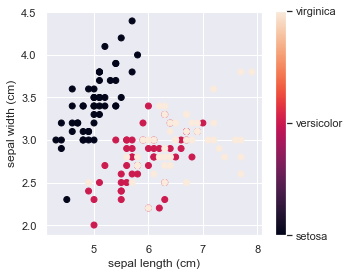

In [19]:
x_index = 0
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4)

* x_train contains the training features
* x_test contains the testing features
* y_train contains the training label
* y_test contains the testing labels

## Classification using Support Vector Machines(SVM)

In [29]:
model = SVC(kernel = 'linear', C=1.0)
model.fit(X,y)
y_pred = model.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,y_pred)* 100, 2)
print(metrics.classification_report(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy: 0.9833333333333333


In [30]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print('Accuracy of linear SVC on training set: {:.2f}'.format(acc_train))
print('Accuracy of linear SVC on test set: {:.2f}'.format(acc_test))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


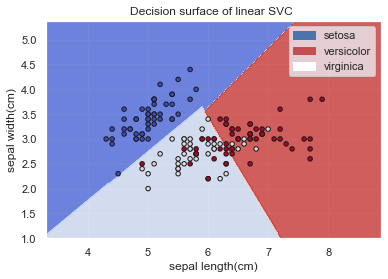

In [31]:
# when we only focus on the sepal size of three classes
X_temp = iris.data[:, :2] #takes the first two features
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel='linear')
clf = model.fit(X_temp, y)

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X_temp[:, 0], X_temp[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_title(title)
ax.set_xlabel("sepal length(cm)")
ax.set_ylabel("sepal width(cm)")
pop_a = mpatches.Patch(color='b', label='setosa')
pop_b = mpatches.Patch(color='r', label='versicolor')
pop_c = mpatches.Patch(color='w', label='virginica')
ax.legend(handles=[pop_a,pop_b,pop_c])
plt.show()

### Confusion Matrix
To look more closely at the predictions that the model made, we can use the confusion matrix. In the confusion matrix, the predicted values are the columns and the actual are the rows. 

It allows us to see where the model makes true and false predictions, and if it predicts incorrectly, we can see which class it is predicting falsely.

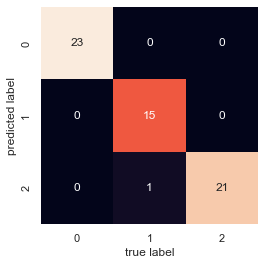

In [32]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In the above confusion matrix, 
* 0 reppresents Iris setosa
* 1 represents Iris versicolor
* 2 repressents Iris virginica

From this confusion matrix, we see that there is one versicolor which we predict to be virginica. Combined with the accuracy data, SVM has a good performance on the prediction of model.

## Classification using Naive Bayes

In [33]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



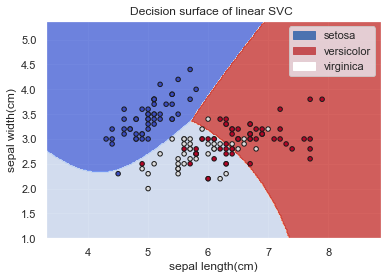

In [34]:
# when we only focus on the sepal size of three classes
X_temp = iris.data[:, :2] #takes the first two features
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = GaussianNB()
clf = model.fit(X_temp, y)


fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X_temp[:, 0], X_temp[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_title(title)
ax.set_xlabel("sepal length(cm)")
ax.set_ylabel("sepal width(cm)")
pop_a = mpatches.Patch(color='b', label='setosa')
pop_b = mpatches.Patch(color='r', label='versicolor')
pop_c = mpatches.Patch(color='w', label='virginica')
ax.legend(handles=[pop_a,pop_b,pop_c])
plt.show()

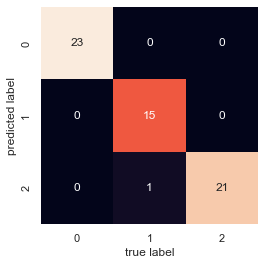

In [35]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In the above confusion matrix, 
* 0 reppresents Iris setosa
* 1 represents Iris versicolor
* 2 repressents Iris virginica

From this confusion matrix, we see that there are one versicolors which we predict to be virginica.

## Classification using Random Forest

In [36]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,y_pred)* 100, 2)
print(metrics.classification_report(y_pred, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      0.94      0.94        16
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9666666666666667


In [37]:
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)

print('Accuracy of Random forest on training set: {:.2f}'.format(acc_train))
print('Accuracy of Random forest on test set: {:.2f}'.format(acc_test))

Accuracy of Random forest on training set: 1.00
Accuracy of Random forest on test set: 0.97


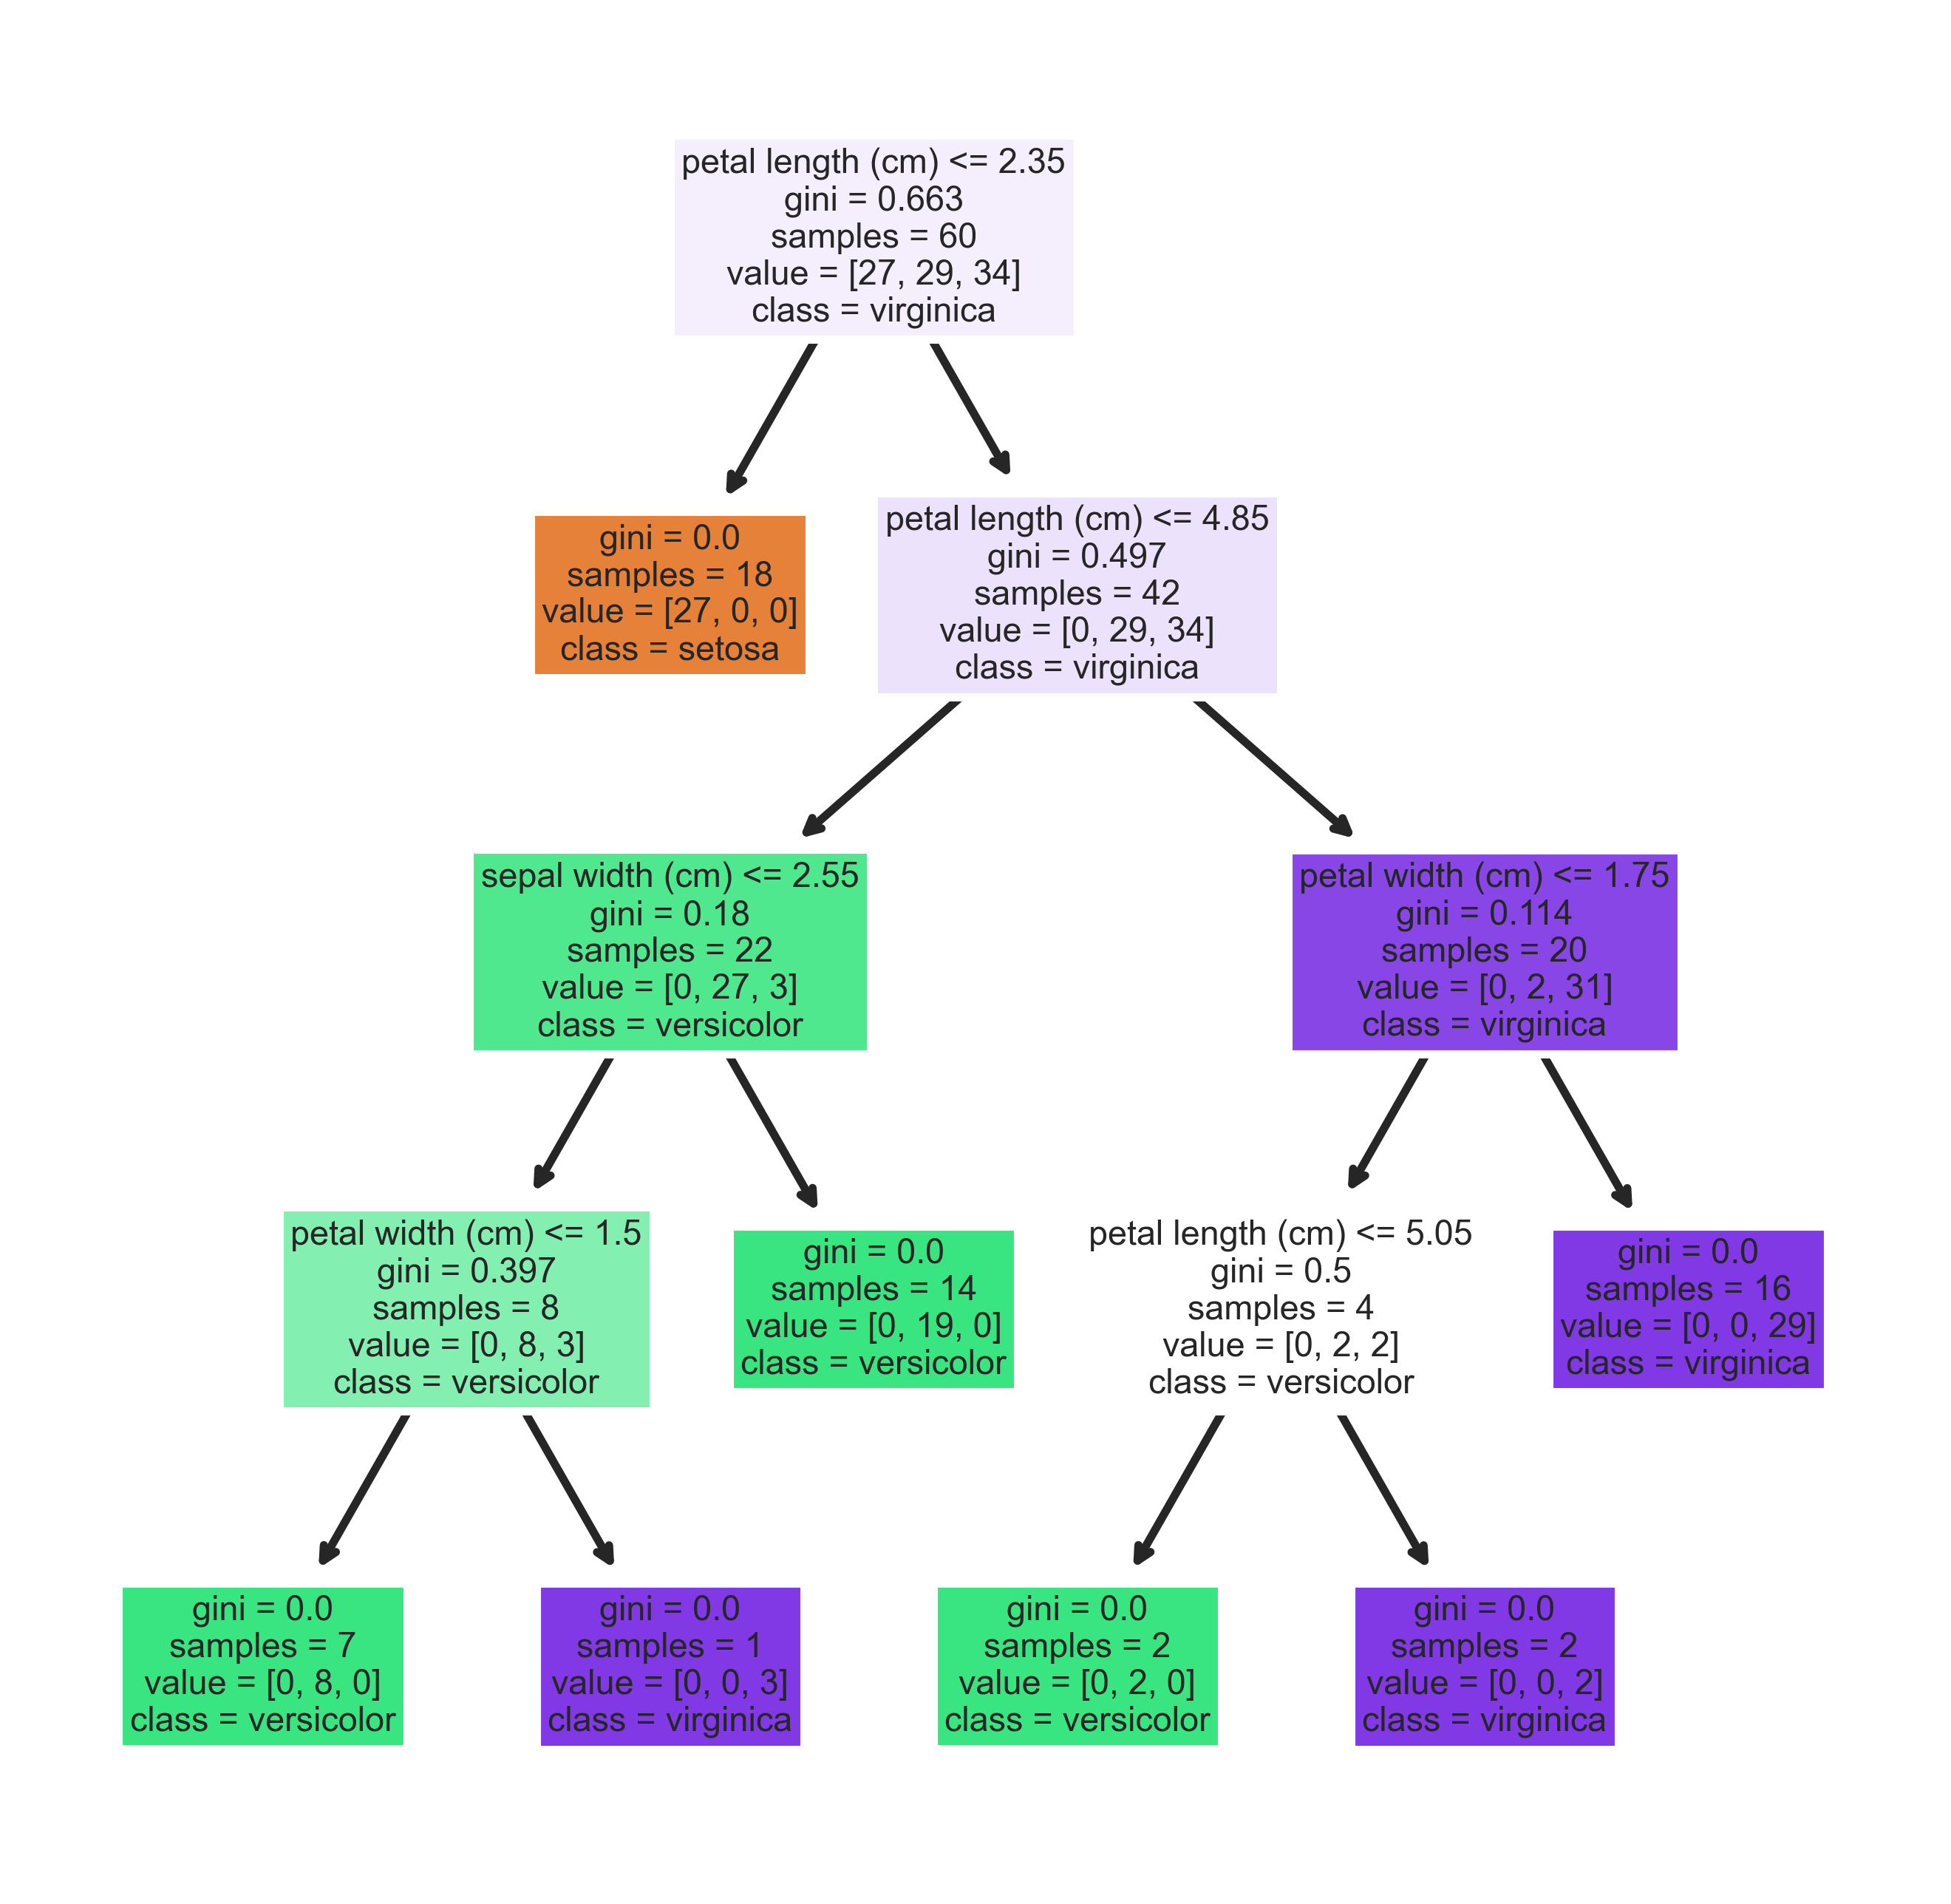

In [38]:
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

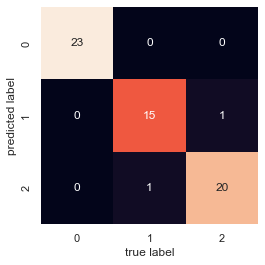

In [39]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In the above confusion matrix, 
* 0 reppresents Iris setosa
* 1 represents Iris versicolor
* 2 repressents Iris virginica

From this confusion matrix, we see that there are one versicolor which we predict to be virginica and one virginica is predicted to be versicolor.

## Result

In [40]:
results = pd.DataFrame({
    'Model': ['SVM',
              'Naive Bayes',  
              'Random Forest'],
    "Accuracy_score":[accuracy_svc,
                      accuracy_nb,
                      accuracy_rf
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(6)

,Model,Accuracy_score
0,SVM,98.33
1,Naive Bayes,98.33
2,Random Forest,96.67


From this table, we could say SVM and Naive Bayes both perform good, and better than Random Forest.